In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# Load the dataset
# Make sure the file is in the same directory or provide the full path
df = pd.read_csv('Data_eCommerce.csv')

# Display the first few rows to verify the data is loaded correctly
display(df.head())

,CustID,Order,Visits,Device,Region,Distance,Shirtsyment,Gender,FaceTime,NoDevices,Category,Csat,MaritalState,NumAdress,Complaints,Coupons,NumOrders,LastOrder,Returns,BasSize
0,53418,Nein,1.0,Computer,1,12.0,Debit Card,Male,4.0,4,Shirts,2,Single,3,0,2.0,2.0,1.0,135.51,0
1,50833,Nein,13.0,Computer,1,22.0,Debit Card,Male,3.0,3,Shirts,3,Married,10,0,1.0,1.0,0.0,135.44,0
2,52303,Nein,13.0,Computer,1,22.0,Debit Card,Male,3.0,3,Shirts,3,Married,10,0,1.0,1.0,0.0,135.44,0
3,51145,Nein,16.0,Phone,2,8.0,Debit Card,Male,3.0,3,Shirts,1,Single,1,0,0.0,1.0,8.0,135.39,0
4,52615,Nein,16.0,Phone,2,8.0,Debit Card,Male,3.0,3,Shirts,1,Single,1,0,1.0,1.0,8.0,135.39,0


In [2]:
# Check data types and missing values
print("--- Data Info ---")
df.info()

# Statistical summary for numerical variables
print("\n--- Numerical Summary ---")
display(df.describe())

# Statistical summary for categorical variables
print("\n--- Categorical Summary ---")
display(df.describe(include=['O']))

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustID        5630 non-null   int64  
 1   Order         5630 non-null   object 
 2   Visits        5366 non-null   float64
 3   Device        5630 non-null   object 
 4   Region        5630 non-null   int64  
 5   Distance      5379 non-null   float64
 6   Shirtsyment   5630 non-null   object 
 7   Gender        5630 non-null   object 
 8   FaceTime      5375 non-null   float64
 9   NoDevices     5630 non-null   int64  
 10  Category      5630 non-null   object 
 11  Csat          5630 non-null   int64  
 12  MaritalState  5630 non-null   object 
 13  NumAdress     5630 non-null   int64  
 14  Complaints    5630 non-null   int64  
 15  Coupons       5374 non-null   float64
 16  NumOrders     5372 non-null   float64
 17  LastOrder     5323 non-null   float64
 18  Returns   

,CustID,Visits,Region,Distance,FaceTime,NoDevices,Csat,NumAdress,Complaints,Coupons,NumOrders,LastOrder,Returns,BasSize
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5374.000000,5372.000000,5323.000000,5630.000000,5630.000000
mean,52815.500000,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,1.751023,3.008004,4.543491,177.223030,63.471403
std,1625.385339,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,1.894621,2.939680,3.654433,49.207036,152.179547
min,50001.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51408.250000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,145.770000,0.000000
50%,52815.500000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,1.000000,2.000000,3.000000,163.280000,0.000000
75%,54222.750000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,2.000000,3.000000,7.000000,196.392500,0.000000
max,55630.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,16.000000,16.000000,46.000000,324.990000,595.000000



--- Categorical Summary ---


,Order,Device,Shirtsyment,Gender,Category,MaritalState
count,5630,5630,5630,5630,5630,5630
unique,2,3,7,2,6,3
top,Nein,Mobile Phone,Debit Card,Male,Accessory,Married
freq,4682,2765,2314,3384,2050,2986


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("--- Missing Values ---")
print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Note: The column 'Shirtsyment' appears to be a typo for 'Payment' based on your description.
# Let's rename it for clarity.
df = df.rename(columns={'Shirtsyment': 'Payment'})

--- Missing Values ---
Visits       264
Distance     251
FaceTime     255
Coupons      256
NumOrders    258
LastOrder    307
dtype: int64

Number of duplicate rows: 0


C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\1430653975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order', data=df, palette='viridis')


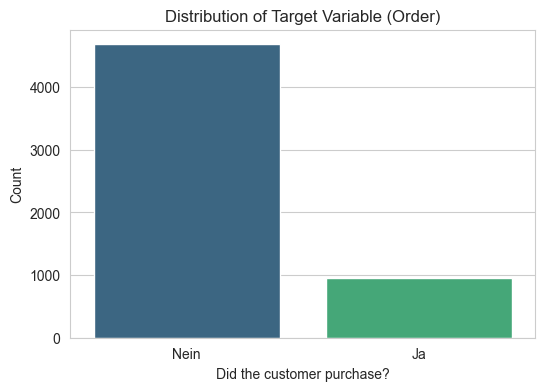

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Order', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Order)')
plt.xlabel('Did the customer purchase?')
plt.ylabel('Count')
plt.show()

C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\3524505746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Payment', data=df, order=df['Payment'].value_counts().index, ax=axes[0, 0], palette='viridis')
C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\3524505746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Device', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\3524505746.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].valu

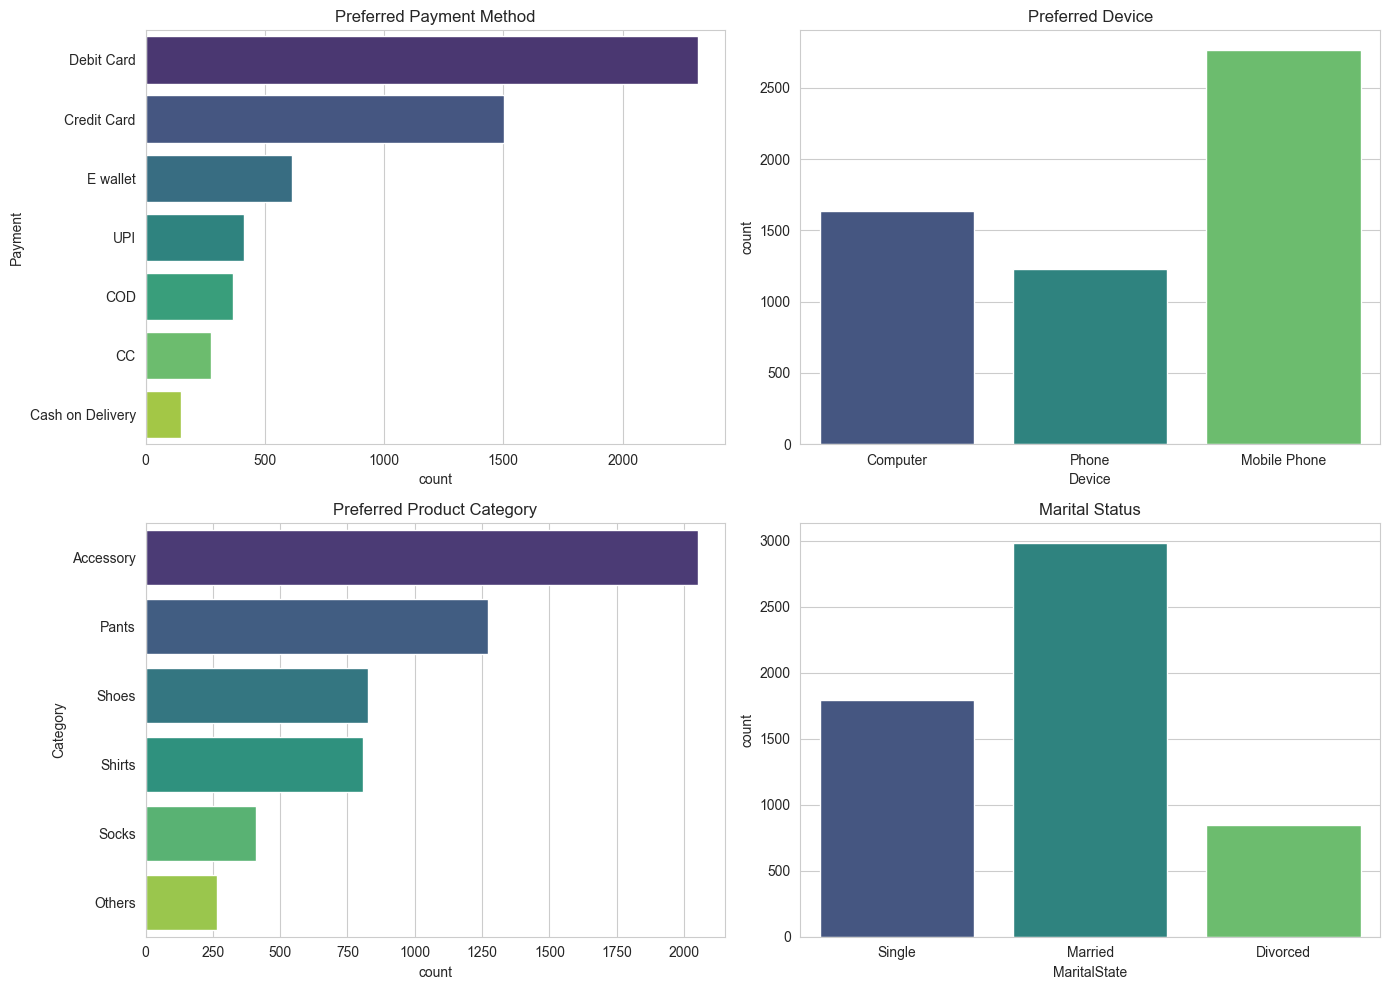

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Payment Method
sns.countplot(y='Payment', data=df, order=df['Payment'].value_counts().index, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Preferred Payment Method')

# Device
sns.countplot(x='Device', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Preferred Device')

# Category
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Preferred Product Category')

# Marital State
sns.countplot(x='MaritalState', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Marital Status')

plt.tight_layout()
plt.show()

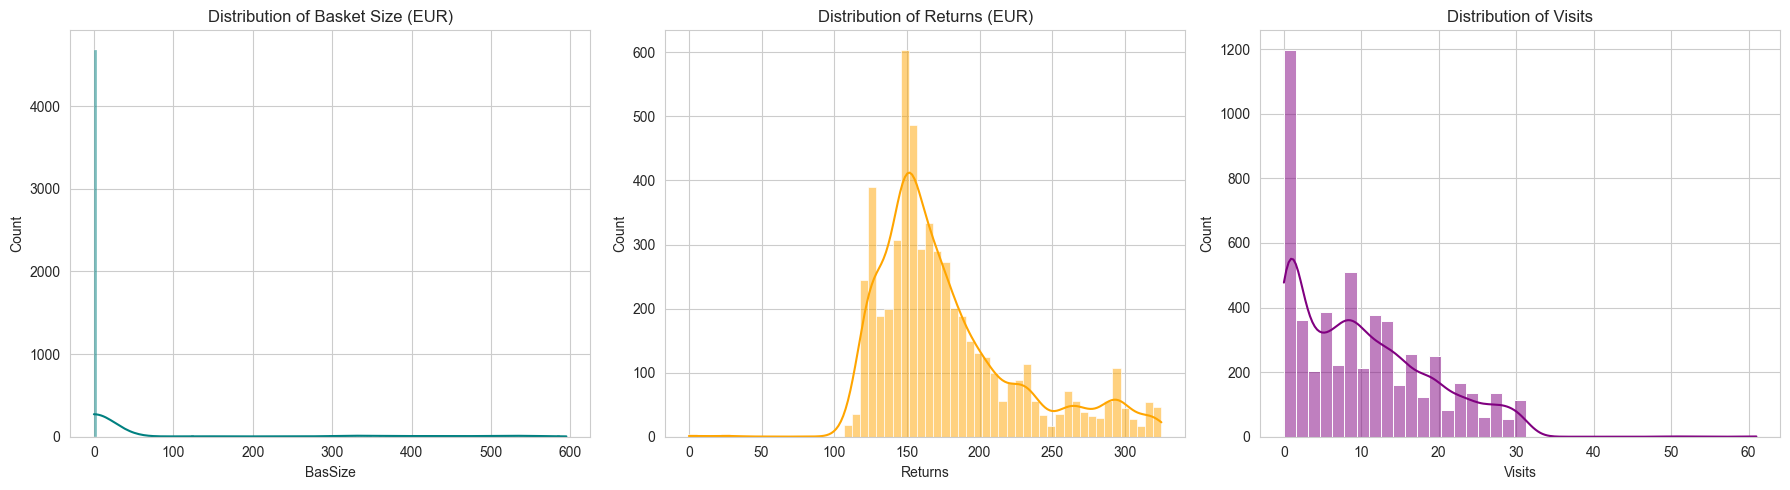

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Basket Size
sns.histplot(df['BasSize'], kde=True, ax=axes[0], color='teal')
axes[0].set_title('Distribution of Basket Size (EUR)')

# Returns
sns.histplot(df['Returns'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Returns (EUR)')

# Visits
sns.histplot(df['Visits'].dropna(), kde=True, ax=axes[2], color='purple')
axes[2].set_title('Distribution of Visits')

plt.tight_layout()
plt.show()

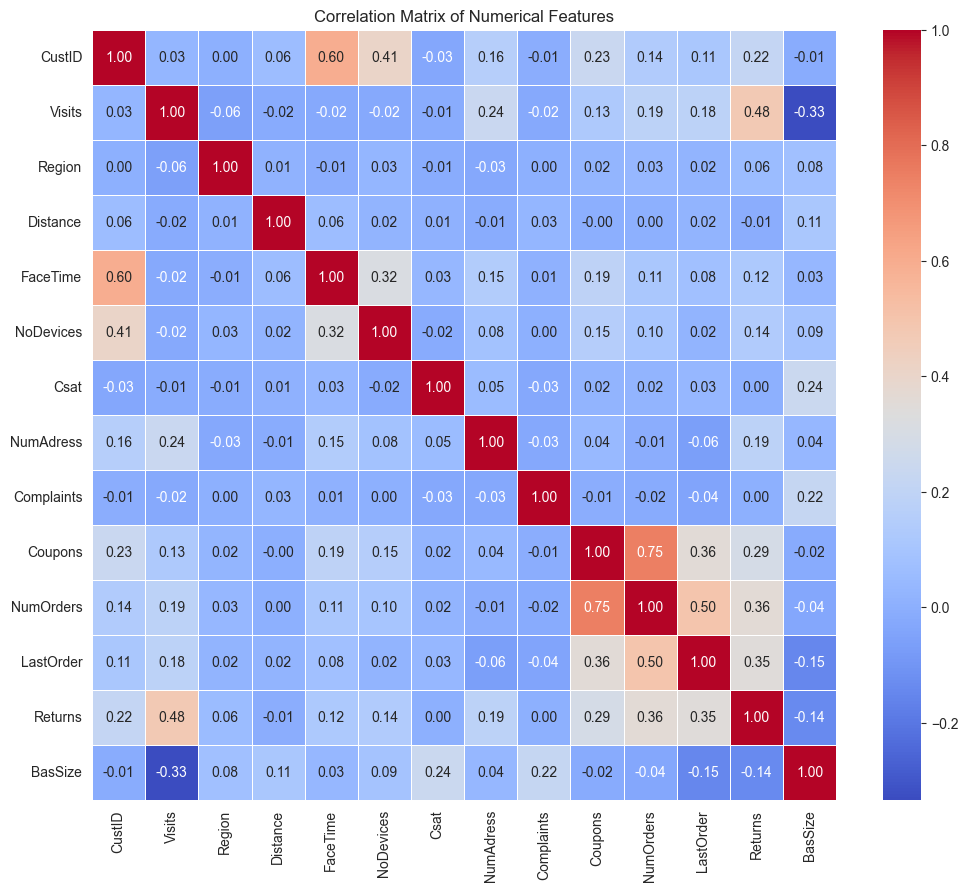

In [7]:
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [8]:
df_clean=df.copy()

In [9]:
# 3. Standardize 'Device'
# Merge 'Mobile Phone' into 'Phone'
df_clean['Device'] = df_clean['Device'].replace({'Mobile Phone': 'Phone'})

# 4. Standardize 'Payment'
# Merge 'CC' -> 'Credit Card' and 'COD' -> 'Cash on Delivery'
df_clean['Payment'] = df_clean['Payment'].replace({
    'CC': 'Credit Card', 
    'COD': 'Cash on Delivery'
})

# 5. Encode Target Variable 'Order'
# Machine learning models require numbers. Map 'Nein' to 0 and 'Ja' to 1.
df_clean['Order'] = df_clean['Order'].map({'Nein': 0, 'Ja': 1})

# Check the new unique values
print("Unique Devices:", df_clean['Device'].unique())
print("Unique Payments:", df_clean['Payment'].unique())

Unique Devices: ['Computer' 'Phone']
Unique Payments: ['Debit Card' 'Cash on Delivery' 'Credit Card' 'UPI' 'E wallet']


In [13]:
df_clean['Gender_Numeric'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})
# Create a final dataframe for modeling
# 1. Start with the encoded dataframe
df_model = df_encoded.copy()

# 2. Drop the original 'Gender' column (since we have 'Gender_Numeric')
# We also drop 'CustID' because ID numbers are not predictive features
cols_to_drop = ['Gender', 'CustID']

# Check if they exist before dropping to avoid errors if you run this cell twice
df_model = df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns])

# 3. Double check: Ensure all data is numeric
print("Data Types in Final Set:")
print(df_model.dtypes)

# Now this code should work without error:
print("\nCorrelation with Order:")
print(df_model.corr()['Order'].sort_values(ascending=False).head())


Data Types in Final Set:
Order                     int64
Visits                  float64
Region                    int64
Distance                float64
FaceTime                float64
NoDevices                 int64
Csat                      int64
NumAdress                 int64
Complaints                int64
Coupons                 float64
NumOrders               float64
LastOrder               float64
Returns                 float64
BasSize                   int64
Gender_Numeric            int64
Device_Phone               bool
Payment_Credit Card        bool
Payment_Debit Card         bool
Payment_E wallet           bool
Payment_UPI                bool
Category_Others            bool
Category_Pants             bool
Category_Shirts            bool
Category_Shoes             bool
Category_Socks             bool
MaritalState_Married       bool
MaritalState_Single        bool
dtype: object

Correlation with Order:
Order                  1.000000
BasSize                0.926983
Complain

In [ ]:
df_save = df.copy()

Data Types in Final Set:
Order                         int64
Visits                      float64
Region                        int64
Distance                    float64
FaceTime                    float64
NoDevices                     int64
Csat                          int64
NumAdress                     int64
Complaints                    int64
Coupons                     float64
NumOrders                   float64
LastOrder                   float64
Returns                     float64
BasSize                       int64
Gender_Numeric                int64
Device_Mobile Phone            bool
Device_Phone                   bool
Payment_COD                    bool
Payment_Cash on Delivery       bool
Payment_Credit Card            bool
Payment_Debit Card             bool
Payment_E wallet               bool
Payment_UPI                    bool
Category_Others                bool
Category_Pants                 bool
Category_Shirts                bool
Category_Shoes                 bool
Cat

C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\1232458789.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.head(10).values, y=correlation.head(10).index, palette='viridis')


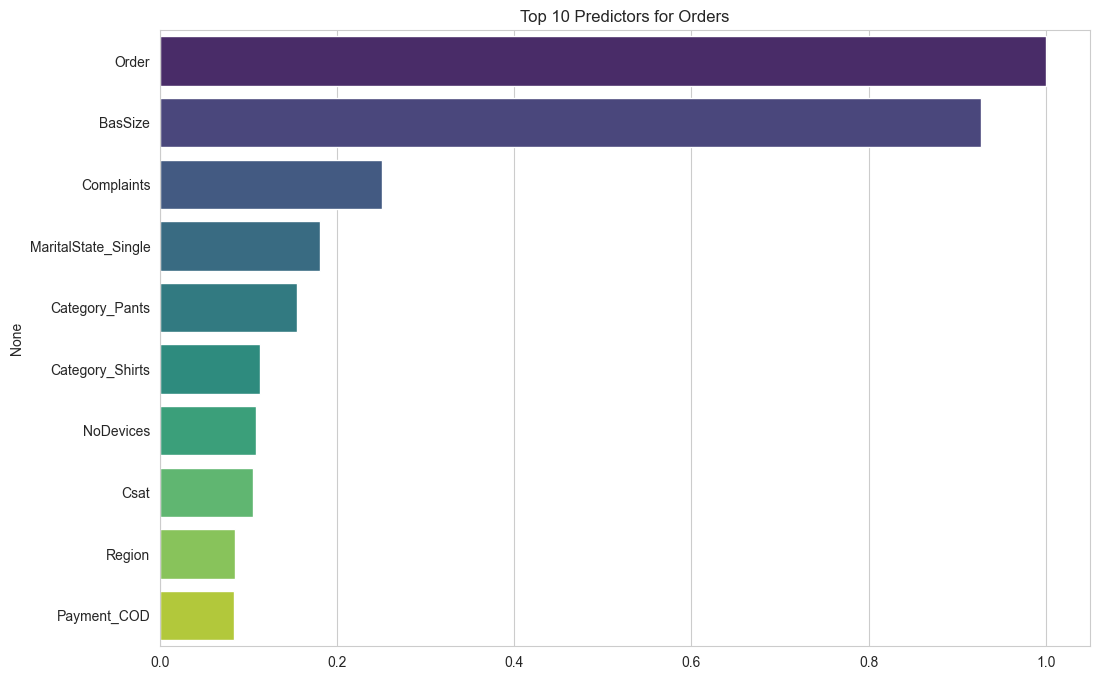

In [16]:
df['Order'] = df['Order'].map({'Nein': 0, 'Ja': 1})

# Fill Missing Values with Median
numerical_cols = ['Visits', 'Distance', 'FaceTime', 'Coupons', 'NumOrders', 'LastOrder']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# --- 3. Feature Encoding ---

# A. Label Encoding for 'Gender'
# We create a NEW numeric column, but the OLD 'Gender' column still exists!
df['Gender_Numeric'] = df['Gender'].map({'Male': 0, 'Female': 1})

# B. One-Hot Encoding for other categoricals
# pd.get_dummies automatically handles 'Device', 'Payment', etc. and removes the originals.
categorical_cols = ['Device', 'Payment', 'Category', 'MaritalState']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 4. THE FIX: Drop remaining non-numeric columns ---
# We must manually drop 'Gender' (because we did manual mapping) and 'CustID'.
cols_to_drop = ['Gender', 'CustID']
df_final = df_encoded.drop(columns=cols_to_drop)

# --- 5. Verification ---
# Now verify that all columns are numeric
print("Data Types in Final Set:")
print(df_final.dtypes)

# Now the correlation matrix will work perfectly
plt.figure(figsize=(12, 8))
correlation = df_final.corr()['Order'].sort_values(ascending=False)

# Display Top 10 positive correlations
print("\nTop 10 Factors increasing purchase probability:")
print(correlation.head(10))

# Visualizing
sns.barplot(x=correlation.head(10).values, y=correlation.head(10).index, palette='viridis')
plt.title('Top 10 Predictors for Orders')
plt.show()

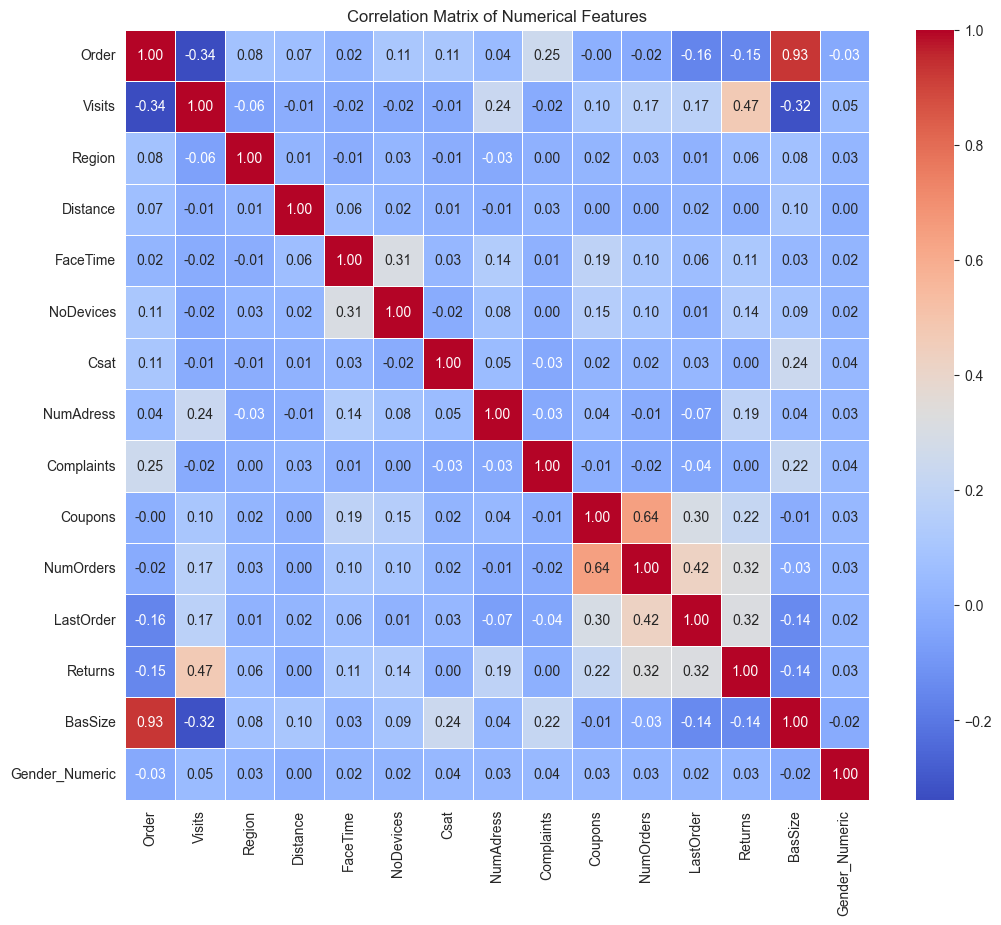

In [17]:
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation
numeric_df = df_final.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [18]:
missing_values = df.isnull().sum()
print("--- Missing Values ---")
print(missing_values[missing_values > 0])

--- Missing Values ---
Series([], dtype: int64)


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1405
           1       1.00      1.00      1.00       284

    accuracy                           1.00      1689
   macro avg       1.00      1.00      1.00      1689
weighted avg       1.00      1.00      1.00      1689

Accuracy Score: 1.0000


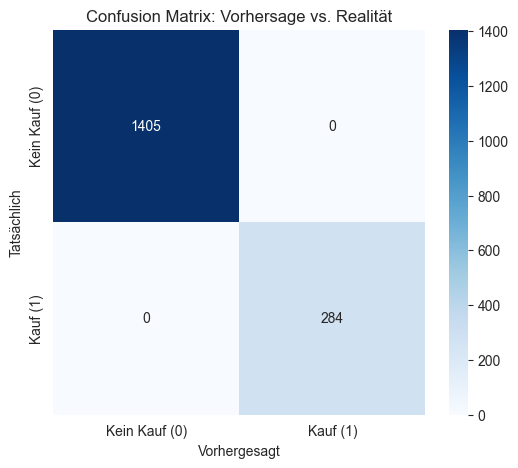


--- Top Einflussfaktoren (Koeffizienten) ---
                     Feature  Coefficient
12                   BasSize     0.251643
25            Category_Shoes     0.001144
17  Payment_Cash on Delivery     0.000392
26            Category_Socks     0.000310
22           Category_Others     0.000031
      Feature  Coefficient
5        Csat    -0.044104
10  LastOrder    -0.061040
11    Returns    -0.067465
0      Visits    -0.100918
2    Distance    -0.211983


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Vorbereitung der Daten (X und y trennen)
# Wir nutzen das bereinigte 'df_final' aus dem vorherigen Schritt
X = df_final.drop('Order', axis=1)
y = df_final['Order']

# 2. Train-Test-Split
# Wir teilen die Daten: 70% zum Trainieren, 30% zum Testen der Leistung.
# 'stratify=y' stellt sicher, dass das Verhältnis von Käufern/Nicht-Käufern in beiden Sets gleich bleibt.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Modelltraining
# Wir erhöhen max_iter, falls das Modell mehr Zeit zum Finden der Lösung braucht
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

# 4. Vorhersagen treffen
predictions = logmodel.predict(X_test)

# 5. Evaluation
print("--- Classification Report ---")
print(classification_report(y_test, predictions))

print(f"Accuracy Score: {accuracy_score(y_test, predictions):.4f}")

# 6. Confusion Matrix visualisieren
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Kein Kauf (0)', 'Kauf (1)'], 
            yticklabels=['Kein Kauf (0)', 'Kauf (1)'])
plt.title('Confusion Matrix: Vorhersage vs. Realität')
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.show()

# 7. Welche Faktoren waren am wichtigsten? (Feature Importance)
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logmodel.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n--- Top Einflussfaktoren (Koeffizienten) ---")
print(coeffs.head(5))
print(coeffs.tail(5))

--- Realistisches Modell (ohne BasSize) ---
Accuracy: 89.34%

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1405
           1       0.81      0.48      0.60       284

    accuracy                           0.89      1689
   macro avg       0.86      0.73      0.77      1689
weighted avg       0.89      0.89      0.88      1689



C:\Users\AlexL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


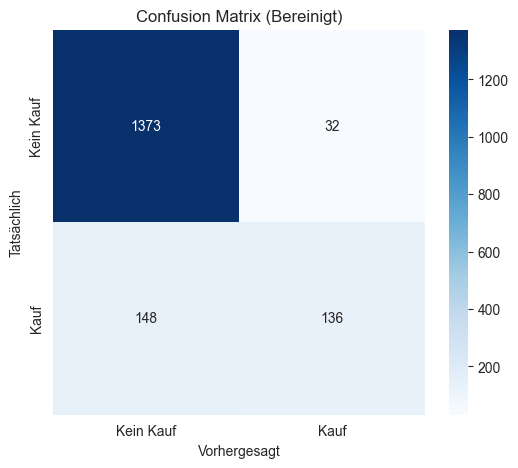


--- Was treibt den Kauf wirklich an? ---
Top 5 Positive Faktoren:


,Feature,Coefficient
21,Category_Others,2.735045
7,Complaints,1.792572
24,Category_Shoes,1.518945
25,Category_Socks,1.421956
23,Category_Shirts,1.132909



Top 5 Negative Faktoren:


,Feature,Coefficient
0,Visits,-0.196825
13,Device_Mobile Phone,-0.342450
12,Gender_Numeric,-0.386545
14,Device_Phone,-0.437277
26,MaritalState_Married,-0.458539


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ... (Annahme: Dein DataFrame 'df_final' ist aus den vorherigen Schritten bereits geladen) ...
# Falls nicht, hier kurz die Vorbereitungsschritte wiederholen:
# 1. Daten säubern (Duplikate weg, NaNs füllen)
# 2. Encoding durchführen (One-Hot, Label Encoding)
# 3. 'df_final' erstellen

# --- DER WICHTIGE TEIL: Features definieren ---
# Wir entfernen 'Order' (Zielvariable) UND 'BasSize' (Data Leakage)
X = df_final.drop(['Order', 'BasSize'], axis=1)
y = df_final['Order']

# Split in Training und Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modell trainieren
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

# Vorhersagen
predictions = logmodel.predict(X_test)

# Evaluation
print("--- Realistisches Modell (ohne BasSize) ---")
print(f"Accuracy: {accuracy_score(y_test, predictions):.2%}")
print("\nClassification Report:\n")
print(classification_report(y_test, predictions))

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Kein Kauf', 'Kauf'],
            yticklabels=['Kein Kauf', 'Kauf'])
plt.title('Confusion Matrix (Bereinigt)')
plt.ylabel('Tatsächlich')
plt.xlabel('Vorhergesagt')
plt.show()

# --- Wahre Einflussfaktoren analysieren ---
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logmodel.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n--- Was treibt den Kauf wirklich an? ---")
print("Top 5 Positive Faktoren:")
display(coeffs.head(5))

print("\nTop 5 Negative Faktoren:")
display(coeffs.tail(5))

--- Random Forest Performance ---
Accuracy: 95.68%

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1405
           1       0.96      0.78      0.86       284

    accuracy                           0.96      1689
   macro avg       0.96      0.89      0.92      1689
weighted avg       0.96      0.96      0.95      1689



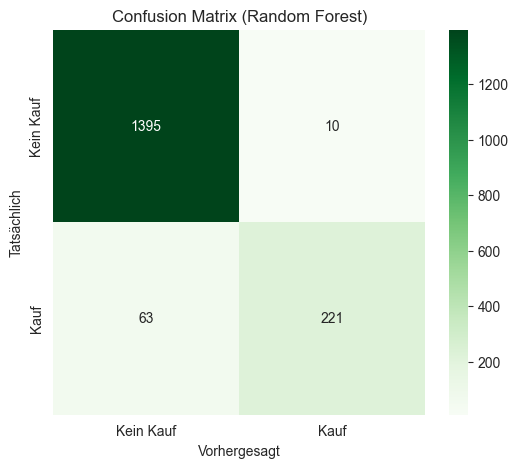


--- Wichtigste Features laut Random Forest ---


,Feature,Importance
0,Visits,0.208794
11,Returns,0.107540
2,Distance,0.079081
10,LastOrder,0.069596
6,NumAdress,0.067437
7,Complaints,0.065337
5,Csat,0.050042
4,NoDevices,0.042637
9,NumOrders,0.033933
8,Coupons,0.031968


C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\3608440311.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')


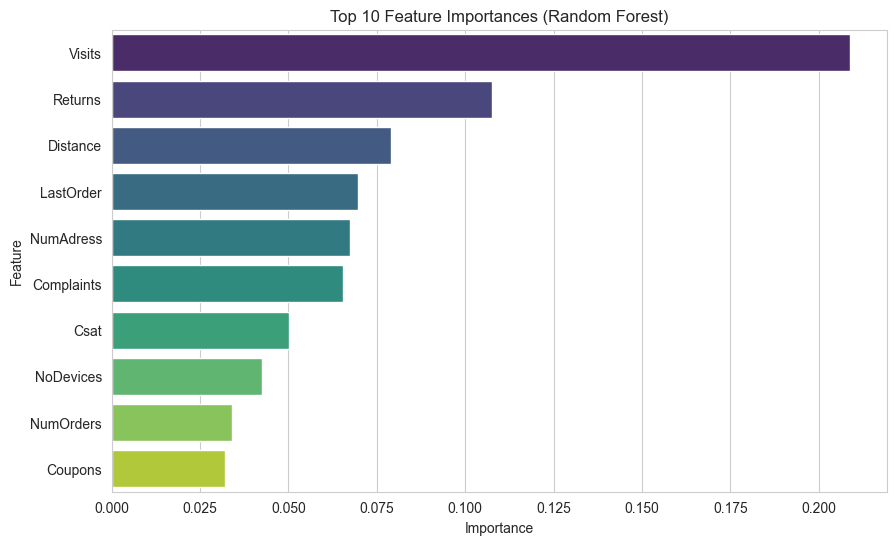

In [22]:
from sklearn.ensemble import RandomForestClassifier

# 1. Modell definieren und trainieren
# n_estimators=100 bedeutet, wir bauen 100 Bäume.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Vorhersagen
predictions_rf = rf_model.predict(X_test)

# 3. Evaluation
print("--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(y_test, predictions_rf):.2%}")
print("\nClassification Report:\n")
print(classification_report(y_test, predictions_rf))

# 4. Vergleich der Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Kein Kauf', 'Kauf'],
            yticklabels=['Kein Kauf', 'Kauf'])
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Tatsächlich')
plt.xlabel('Vorhergesagt')
plt.show()

# 5. Feature Importance im Random Forest
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Wichtigste Features laut Random Forest ---")
display(importances.head(10))

# Visualisierung
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\1172313980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='Anzahl_Käufe', y='Category', palette='viridis')


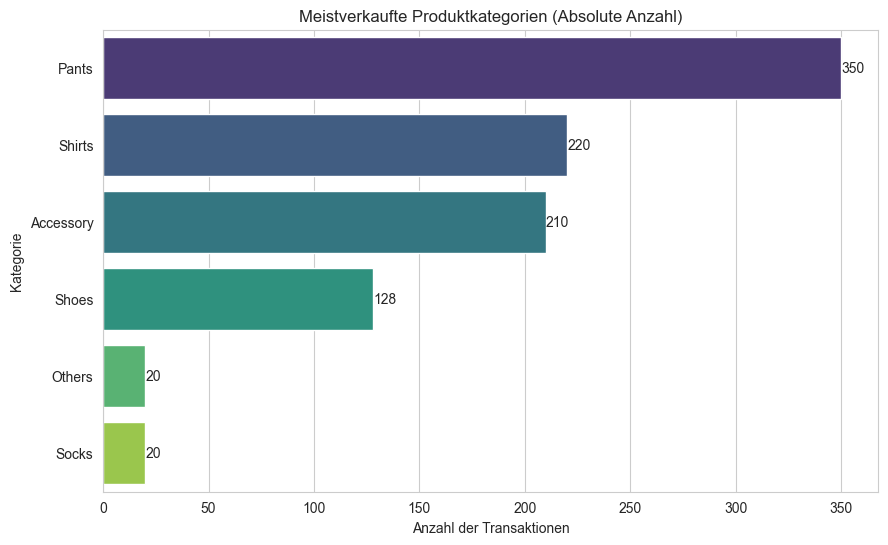

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Annahme: Daten sind bereits geladen und bereinigt wie in vorherigen Schritten) ...

# 1. Filtern auf erfolgreiche Käufe
# Wir interessieren uns nur für Zeilen, wo Order == 'Ja' (oder 1) ist
df_bought = df[df['Order'] == 1] # Oder 'Ja', je nach aktuellem Stand des Dataframes

# 2. Zählen der Vorkommnisse pro Kategorie
category_counts = df_bought['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Anzahl_Käufe']

# 3. Plotten
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='Anzahl_Käufe', y='Category', palette='viridis')

plt.title('Meistverkaufte Produktkategorien (Absolute Anzahl)')
plt.xlabel('Anzahl der Transaktionen')
plt.ylabel('Kategorie')

# Werte direkt an die Balken schreiben für bessere Lesbarkeit
for index, row in category_counts.iterrows():
    plt.text(row.Anzahl_Käufe, index, str(row.Anzahl_Käufe), va='center', fontsize=10)

plt.show()

--- Was steigert die Zufriedenheit? (Top 5) ---
BasSize           0.243980
Order             0.105481
NumAdress         0.053583
Device_Phone      0.048821
Gender_Numeric    0.035220
Name: Csat, dtype: float64

--- Was senkt die Zufriedenheit? (Bottom 5) ---
NoDevices              -0.017228
MaritalState_Single    -0.019314
MaritalState_Married   -0.023576
Complaints             -0.031115
Payment_Debit Card     -0.050365
Name: Csat, dtype: float64


C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\2102745279.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')


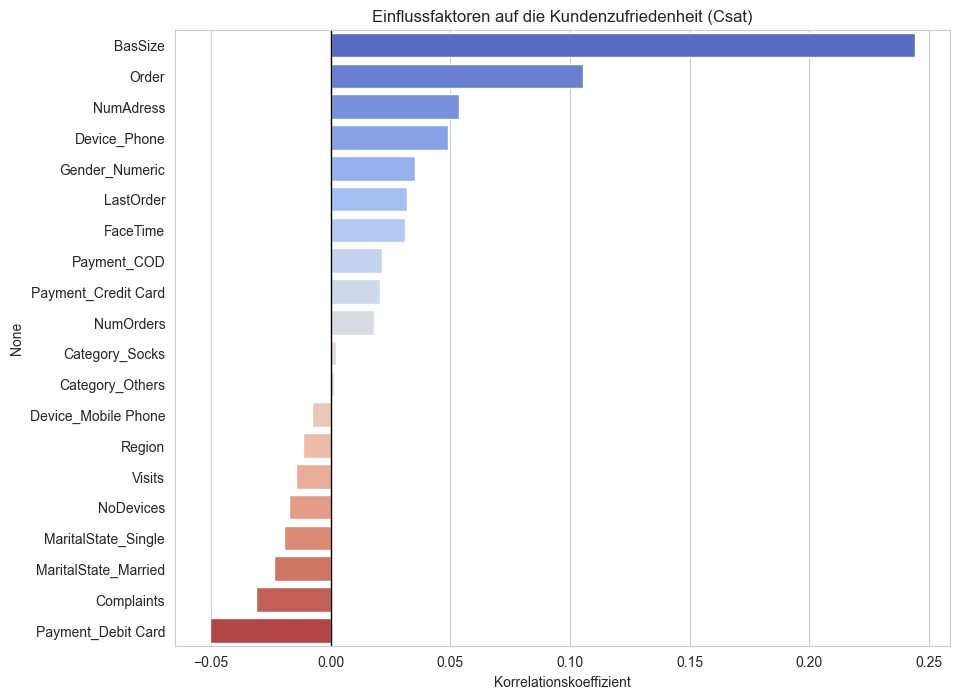

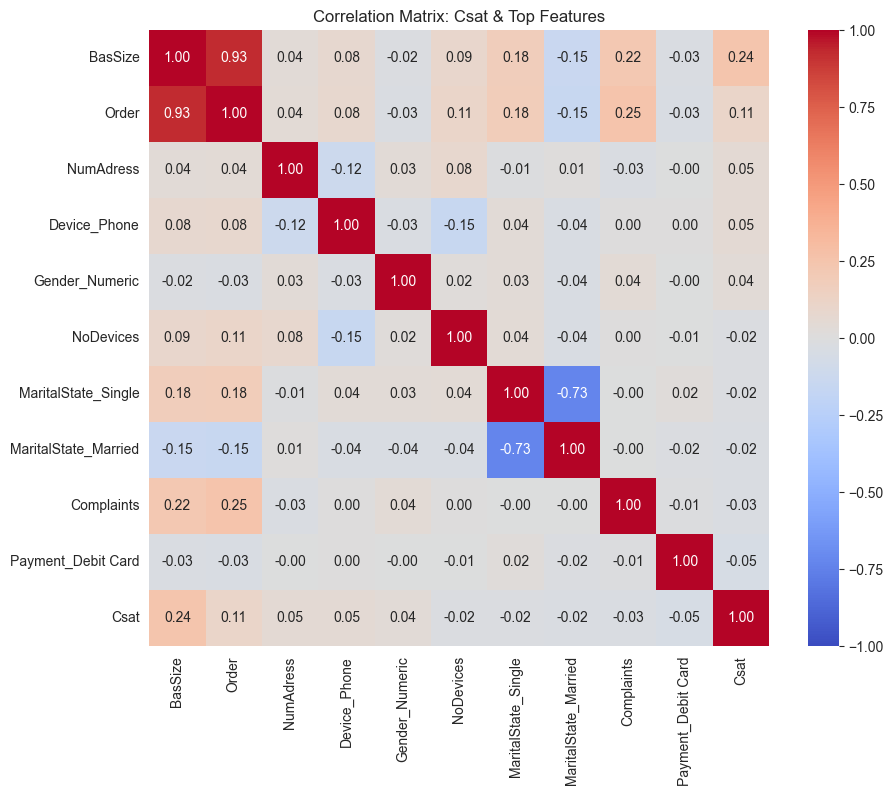

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Standard Datenbereinigung wie oben) ...
# df_final ist unser bereinigtes, numerisches DataFrame

# 1. Korrelationen berechnen
full_corr = df_final.corr()

# 2. Fokus auf 'Csat'
csat_corr = full_corr['Csat'].sort_values(ascending=False)

# Csat selbst aus der Liste entfernen (Korrelation ist immer 1.0)
csat_corr_plot = csat_corr.drop('Csat')

# Ausgabe der Text-Werte
print("--- Was steigert die Zufriedenheit? (Top 5) ---")
print(csat_corr_plot.head(5))
print("\n--- Was senkt die Zufriedenheit? (Bottom 5) ---")
print(csat_corr_plot.tail(5))

# 3. Visualisierung 1: Balkendiagramm der Korrelationen
plt.figure(figsize=(10, 8))
# Wir nehmen die Top 10 positiven und Top 10 negativen Faktoren
top_features = pd.concat([csat_corr_plot.head(10), csat_corr_plot.tail(10)])

sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title('Einflussfaktoren auf die Kundenzufriedenheit (Csat)')
plt.xlabel('Korrelationskoeffizient')
plt.axvline(0, color='black', linewidth=1)
plt.show()

# 4. Visualisierung 2: Klassische Correlation Matrix (Heatmap)
# Wir zeigen nur die relevantesten Features, damit die Matrix lesbar bleibt
top_cols = csat_corr_plot.head(5).index.tolist() + csat_corr_plot.tail(5).index.tolist() + ['Csat']
subset_matrix = df_final[top_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Csat & Top Features')
plt.show()

Data cleaning complete: 556 duplicates removed.
Starting comprehensive analysis...


C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, ax=axes[i], palette='viridis')
C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, ax=axes[i], palette='viridis')
C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=order, ax=axes[i], palette='viridis')
C:\Users\AlexL\A

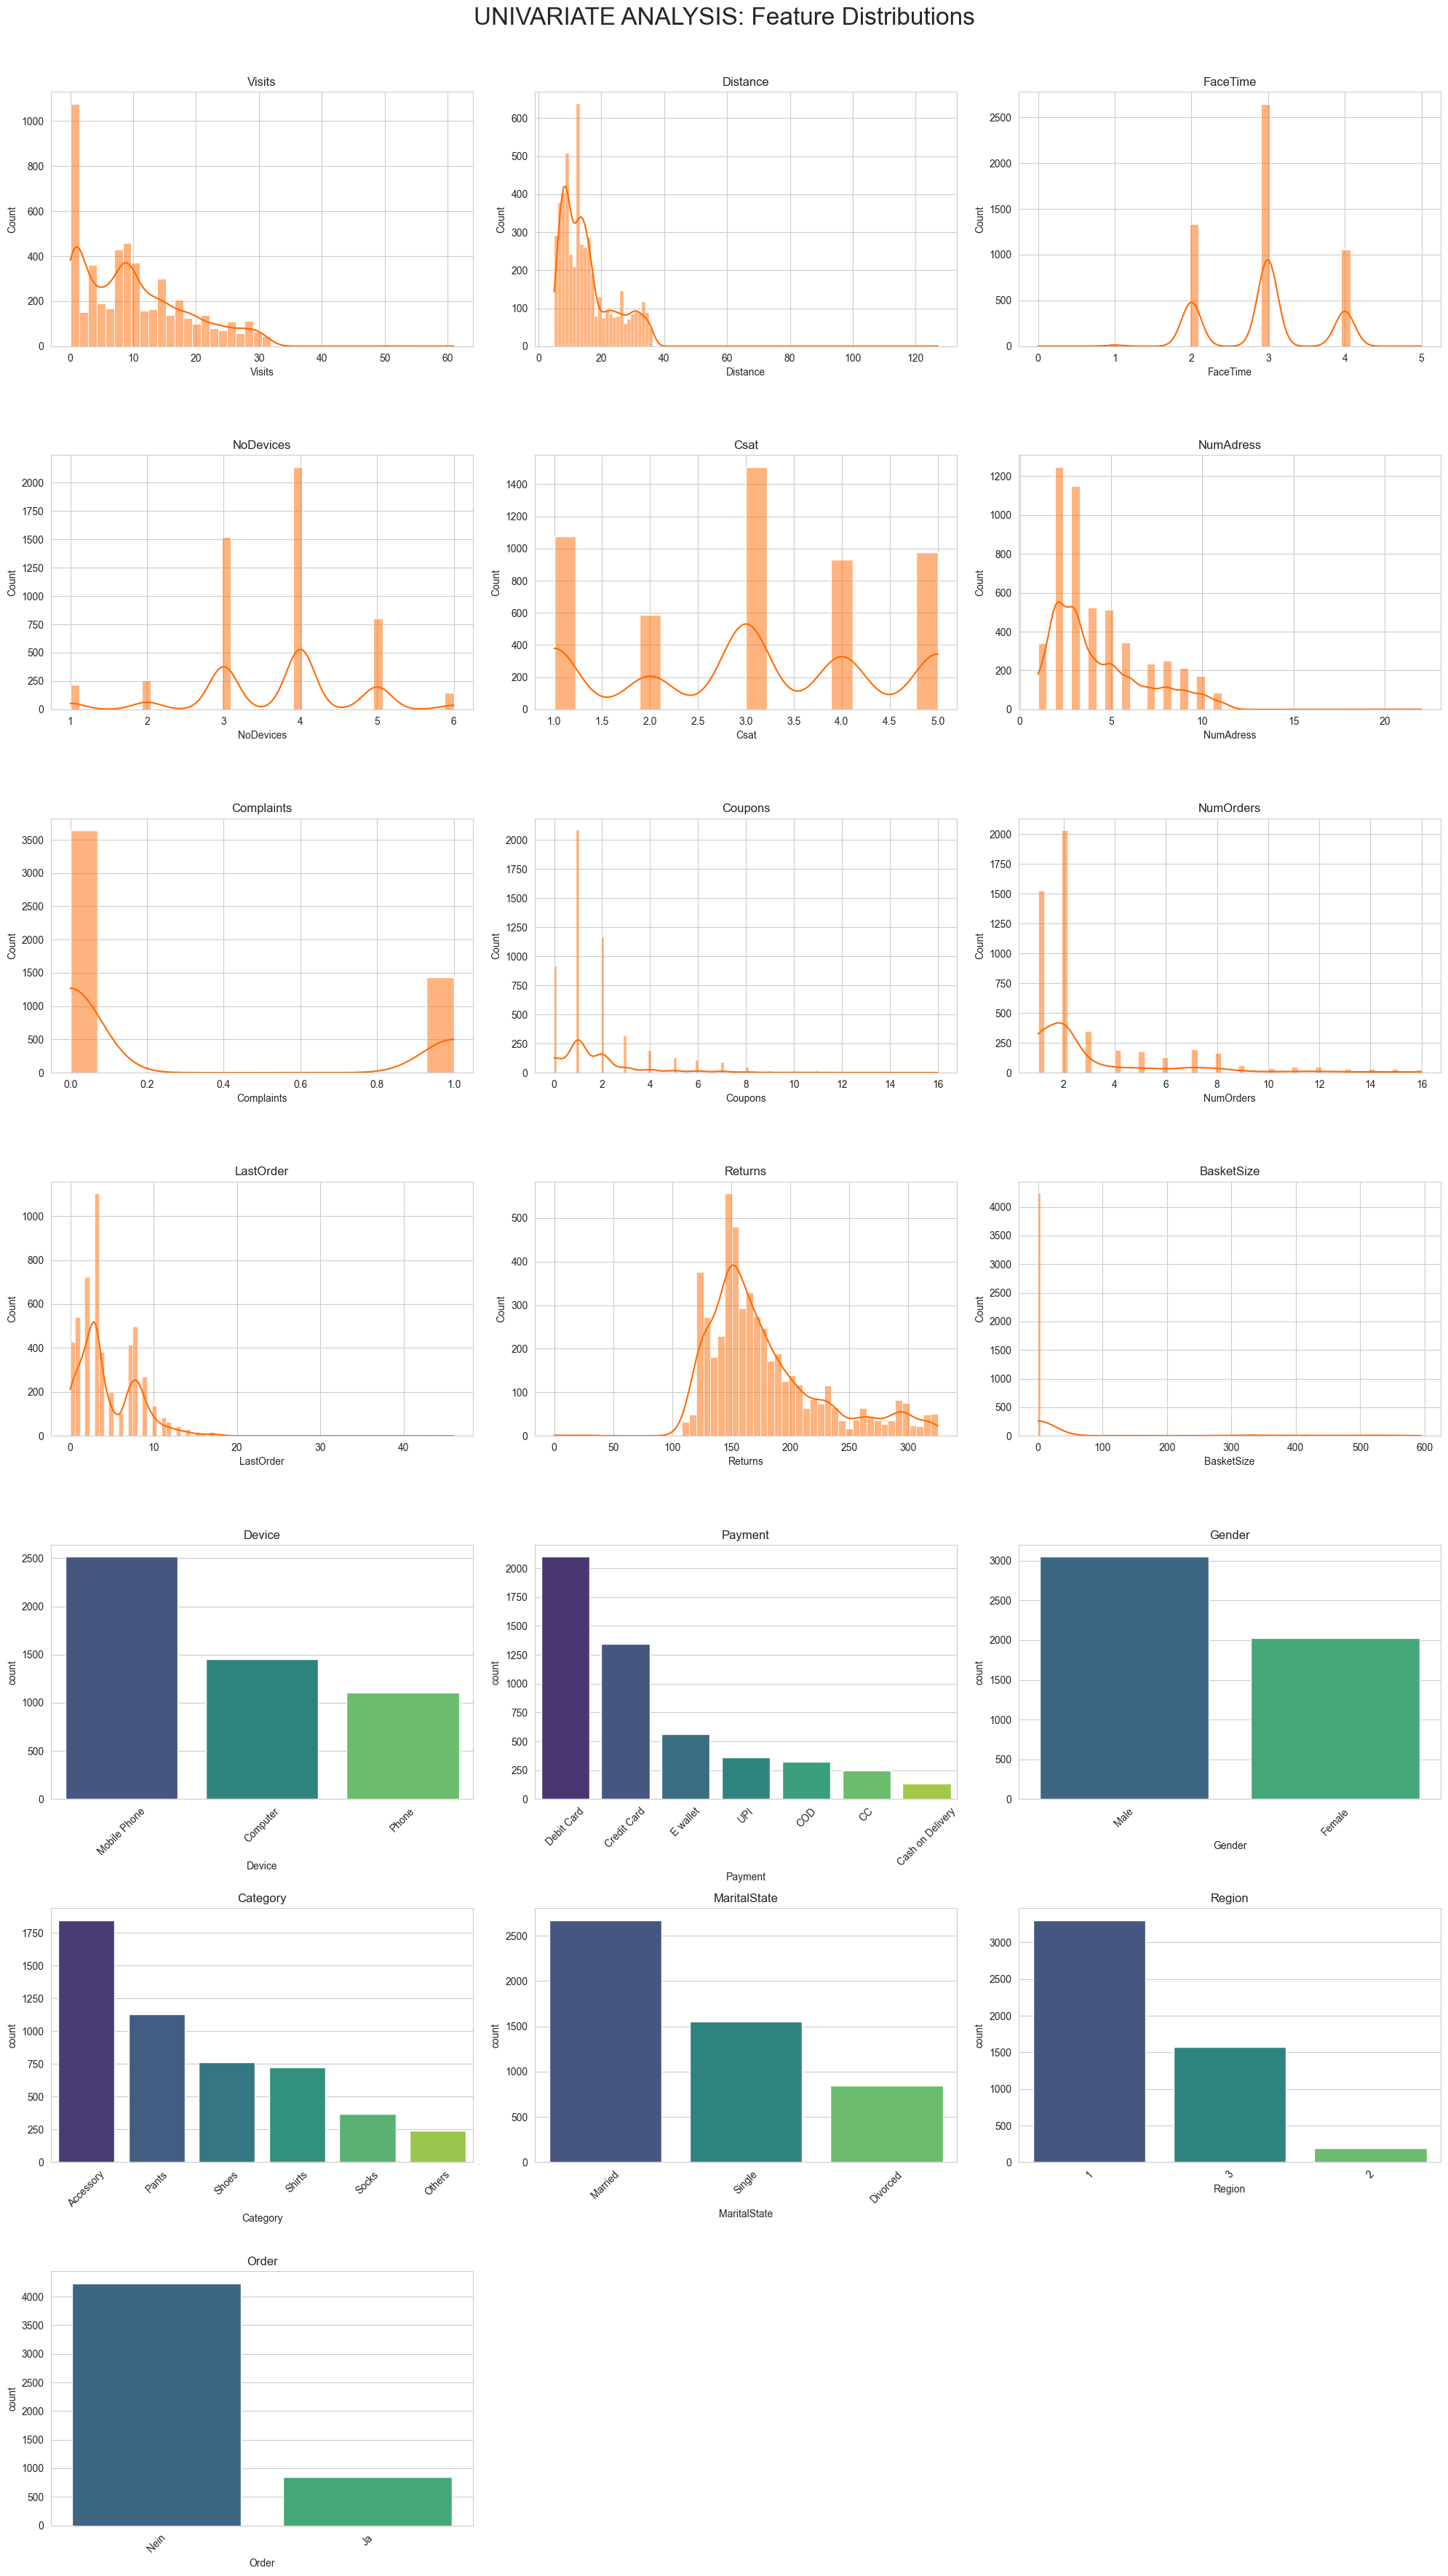

C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='BasketSize', data=data, ax=axes[i], palette='Set2')
C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='BasketSize', data=data, ax=axes[i], palette='Set2')
C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='BasketSize', data=data, ax=axes[i], palette='Set2')
C:\Users\AlexL\AppD

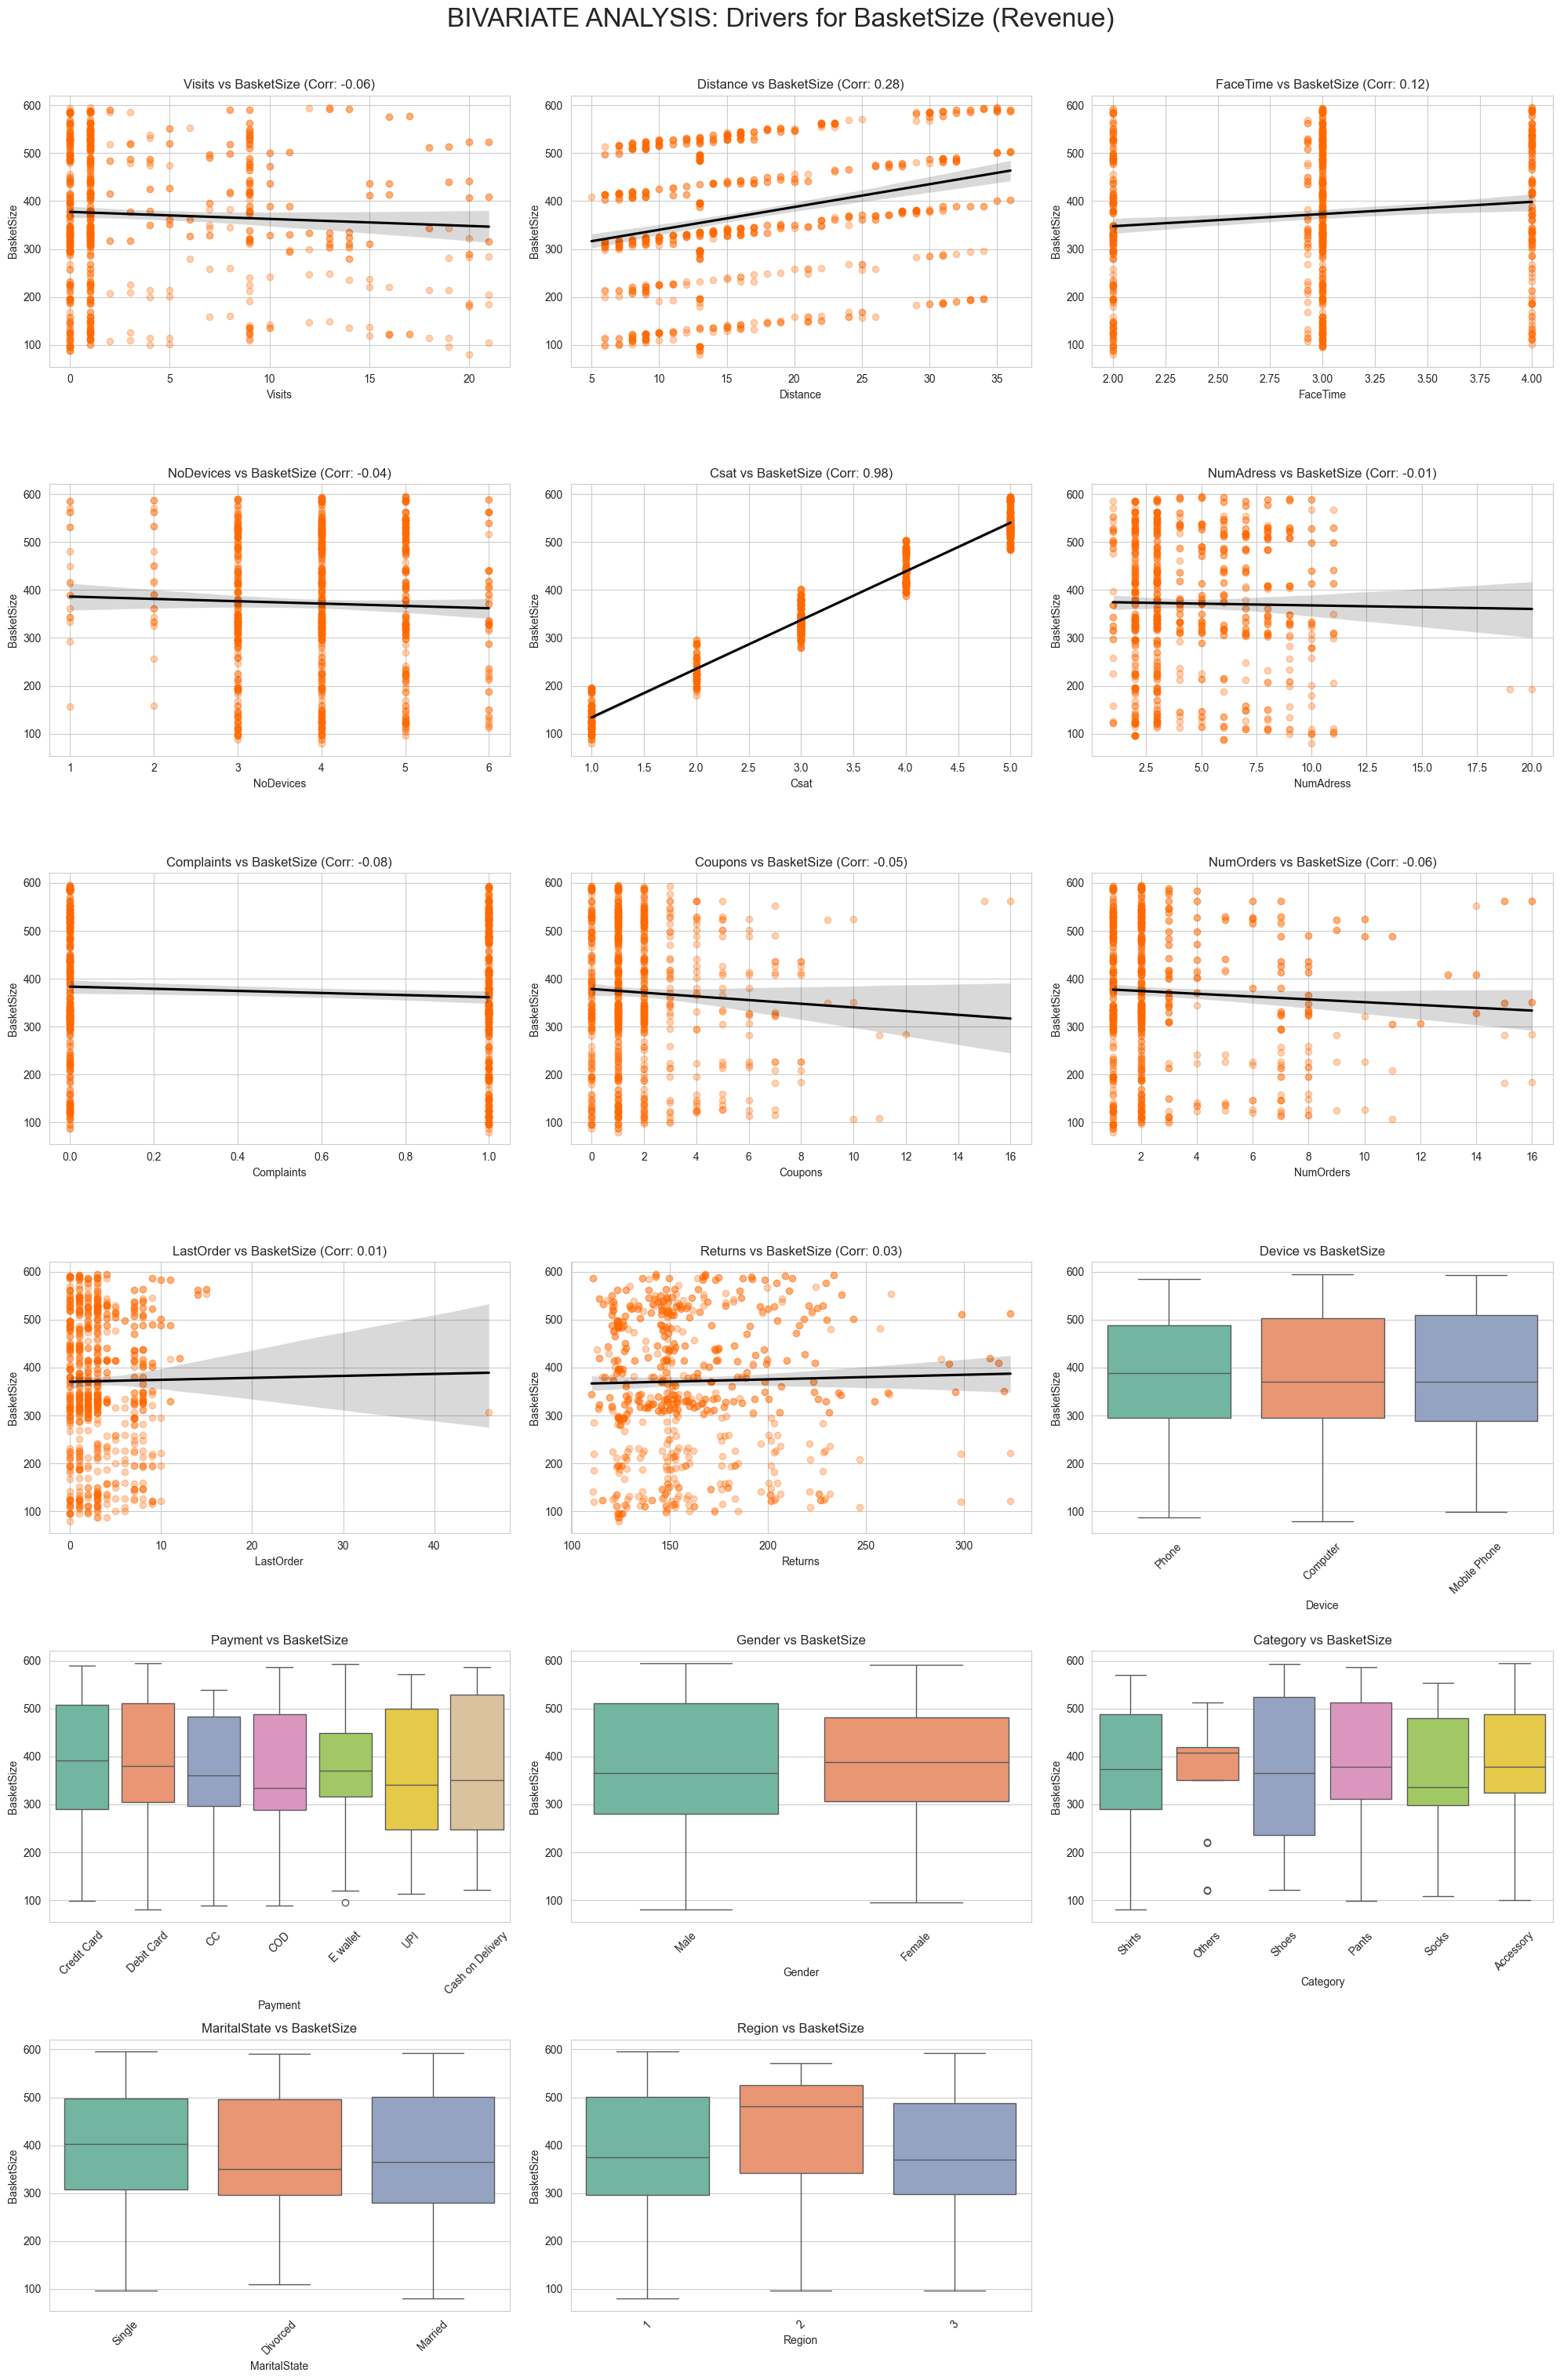

C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='IsBuyer', data=grouped, ax=axes[i], palette='Blues_r')
C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='IsBuyer', data=grouped, ax=axes[i], palette='Blues_r')
C:\Users\AlexL\AppData\Local\Temp\ipykernel_30708\581324073.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='IsBuyer', data=grouped, ax=axes[i], palette='Blues_r')
C:\Users\A

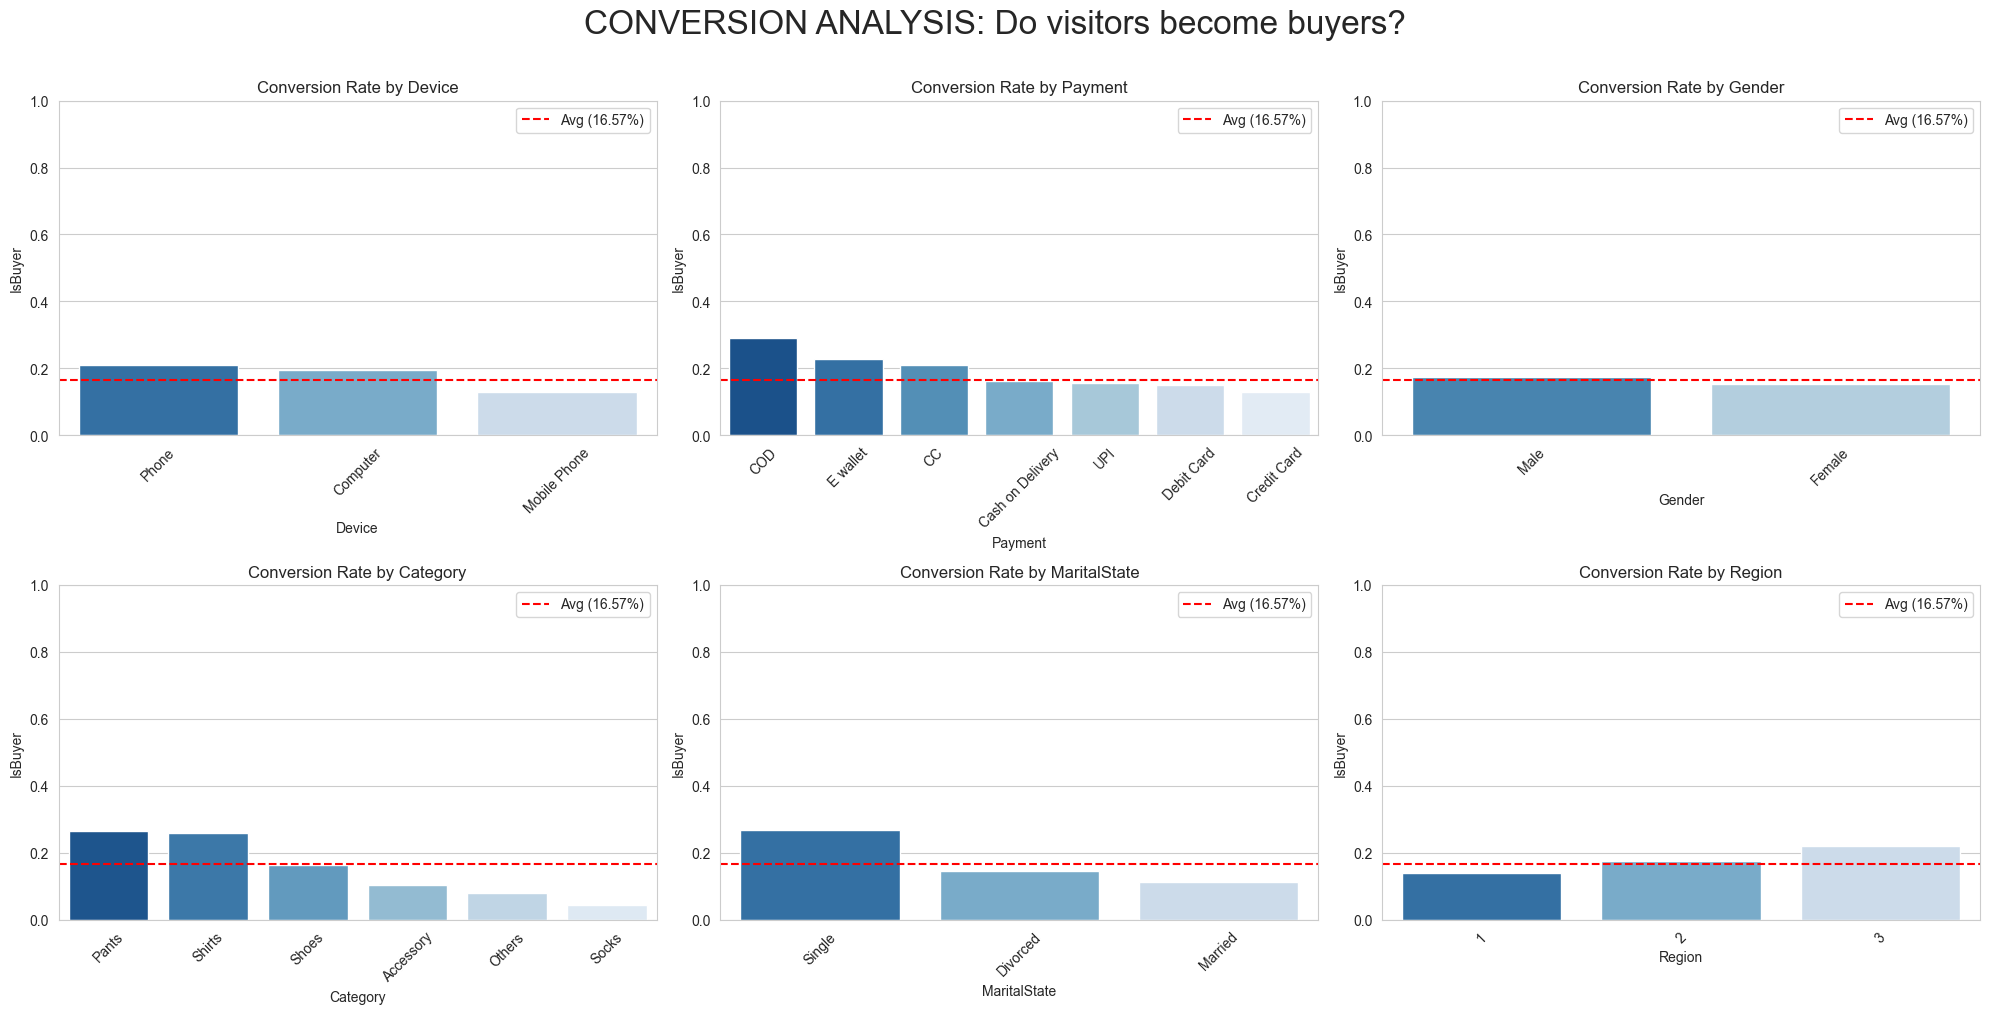

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# --- 1. CONFIG & STYLE ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 15)
# Zalando-like colors (Orange, Black, Grey)
colors = ["#ff6900", "#1a1a1a", "#757575"]
# We set the palette globally, but specific plots can override it
sns.set_palette(sns.color_palette(colors))

# --- 2. DATA LOADING & CLEANING (Isolated for EDA) ---
# We use 'df_eda' to avoid overwriting your 'df' or 'df_final' variables
df_eda = pd.read_csv('Data_eCommerce2.csv')

# A. Correct Typos & Rename for Visualization
df_eda.rename(columns={'Shirtsyment': 'Payment', 'BasSize': 'BasketSize'}, inplace=True)

# B. Remove Duplicates (Consistency)
# We remove duplicates based on all columns except CustID
df_eda_clean = df_eda.drop_duplicates(subset=df_eda.columns.difference(['CustID'])).copy()
print(f"Data cleaning complete: {len(df_eda) - len(df_eda_clean)} duplicates removed.")

# C. Imputation (Missing Values)
# Numeric columns with skewed distribution -> Median
cols_median = ['Distance', 'NumOrders', 'LastOrder', 'Visits', 'Coupons']
# Ensure these columns exist before filling
for col in cols_median:
    if col in df_eda_clean.columns:
        df_eda_clean[col] = df_eda_clean[col].fillna(df_eda_clean[col].median())

# Symmetric distribution -> Mean
if 'FaceTime' in df_eda_clean.columns:
    df_eda_clean['FaceTime'] = df_eda_clean['FaceTime'].fillna(df_eda_clean['FaceTime'].mean())

# D. Feature Engineering
# Boolean Flag for Buyers
# Note: This relies on 'Order' being 'Ja'/'Nein' (which it is in the fresh CSV load)
df_eda_clean['IsBuyer'] = df_eda_clean['Order'].map({'Ja': 1, 'Nein': 0})

# Buyer-only subset for BasketSize analysis
df_eda_buyers = df_eda_clean[df_eda_clean['Order'] == 'Ja'].copy()

# E. Categorization of columns for analysis
numeric_cols = ['Visits', 'Distance', 'FaceTime', 'NoDevices', 'Csat',
                'NumAdress', 'Complaints', 'Coupons', 'NumOrders',
                'LastOrder', 'Returns', 'BasketSize']
# Treat Region as categorical for better visualization
categorical_cols = ['Device', 'Payment', 'Gender', 'Category', 'MaritalState', 'Region', 'Order']

# --- 3. PLOTTING FUNCTIONS (Dynamic) ---

def plot_univariate_all(data, num_cols, cat_cols):
    """1. Univariate Analysis: Distribution of ALL variables"""
    all_cols = num_cols + cat_cols
    # Filter only columns that actually exist in data
    all_cols = [c for c in all_cols if c in data.columns]
    
    n_cols = 3
    n_rows = math.ceil(len(all_cols) / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    fig.suptitle('UNIVARIATE ANALYSIS: Feature Distributions', fontsize=24, y=1.01)
    axes = axes.flatten()
    
    for i, col in enumerate(all_cols):
        if col in num_cols:
            sns.histplot(data[col], kde=True, ax=axes[i], color=colors[0])
        else:
            # Show top 10 categories
            order = data[col].value_counts().iloc[:10].index
            sns.countplot(x=col, data=data, order=order, ax=axes[i], palette='viridis')
            axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_title(col)
            
    # Remove empty subplots
    for i in range(len(all_cols), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

def plot_bivariate_basket(data, num_cols, cat_cols):
    """2. Bivariate Analysis: What drives BasketSize? (Buyers only)"""
    # Don't use BasketSize as a predictor for itself
    predictors_num = [c for c in num_cols if c != 'BasketSize' and c in data.columns]
    predictors_cat = [c for c in cat_cols if c != 'Order' and c in data.columns]
    all_pred = predictors_num + predictors_cat
    
    n_cols = 3
    n_rows = math.ceil(len(all_pred) / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    fig.suptitle('BIVARIATE ANALYSIS: Drivers for BasketSize (Revenue)', fontsize=24, y=1.01)
    axes = axes.flatten()
    
    for i, col in enumerate(all_pred):
        if col in predictors_num:
            # Regplot needs numeric data; drop NaNs just in case
            valid_data = data[[col, 'BasketSize']].dropna()
            sns.regplot(x=col, y='BasketSize', data=valid_data, ax=axes[i],
                        scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
            corr = valid_data[col].corr(valid_data['BasketSize'])
            axes[i].set_title(f'{col} vs BasketSize (Corr: {corr:.2f})')
        else:
            sns.boxplot(x=col, y='BasketSize', data=data, ax=axes[i], palette='Set2')
            axes[i].set_title(f'{col} vs BasketSize')
            axes[i].tick_params(axis='x', rotation=45)
            
    for i in range(len(all_pred), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

def plot_conversion_drivers(data, cat_cols):
    """3. Conversion Analysis: Who buys? (Comparison of conversion rates)"""
    cols_to_plot = [c for c in cat_cols if c != 'Order' and c in data.columns]
    n_cols = 3
    n_rows = math.ceil(len(cols_to_plot) / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    fig.suptitle('CONVERSION ANALYSIS: Do visitors become buyers?', fontsize=24, y=1.01)
    axes = axes.flatten()
    
    avg_conversion = data['IsBuyer'].mean()
    
    for i, col in enumerate(cols_to_plot):
        # Calculate conversion rate per group
        grouped = data.groupby(col)['IsBuyer'].mean().reset_index().sort_values('IsBuyer', ascending=False)
        
        sns.barplot(x=col, y='IsBuyer', data=grouped, ax=axes[i], palette='Blues_r')
        axes[i].axhline(avg_conversion, color='red', linestyle='--', label=f'Avg ({avg_conversion:.2%})')
        axes[i].set_title(f'Conversion Rate by {col}')
        axes[i].set_ylim(0, 1) # Conversion is always 0-1
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend()
        
    for i in range(len(cols_to_plot), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

# --- 4. EXECUTION ---
print("Starting comprehensive analysis...")
plot_univariate_all(df_eda_clean, numeric_cols, categorical_cols)
plot_bivariate_basket(df_eda_buyers, numeric_cols, categorical_cols)
plot_conversion_drivers(df_eda_clean, categorical_cols)

--- Durchschnittswerte pro Cluster ---
   Cluster     Visits   Distance  FaceTime  NumOrders  LastOrder     Returns  \
0        0  12.505549  15.309494  3.039457   8.691739   8.524044  200.780308   
1        1  20.993811  16.707339  2.931919   2.230769   5.345712  229.315650   
2        2   3.315789  17.482219  2.988620   2.186344   2.724040  156.082646   
3        3   6.980905  14.753434  2.894472   1.864657   3.427806  156.063896   

   BasketSize      Csat  
0   27.309494  3.140567  
1    3.303271  3.140584  
2  436.526316  3.963016  
3    8.235176  2.807705  


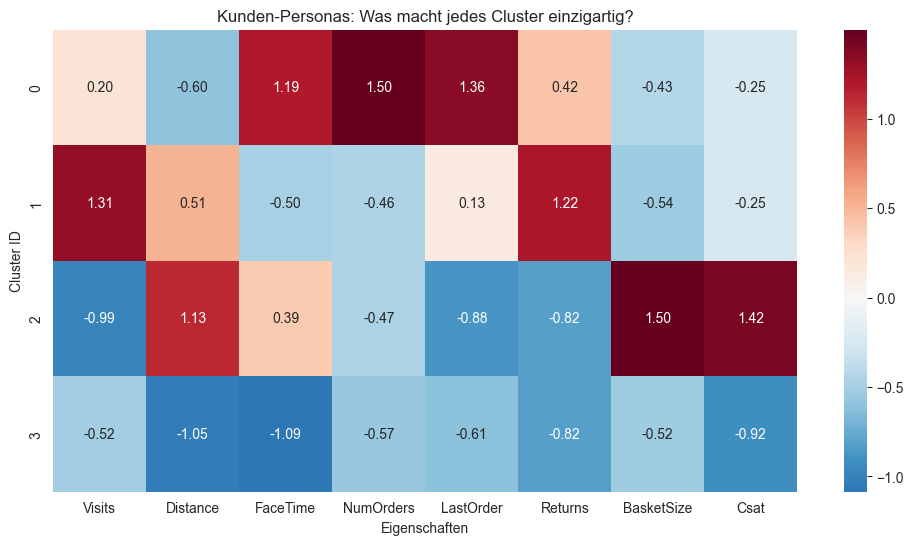

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1. Datenvorbereitung ---
# Wir nutzen df_eda_clean aus dem vorherigen Schritt (oder laden neu)
df_cl = pd.read_csv('Data_eCommerce.csv')
df_cl.rename(columns={'Shirtsyment': 'Payment', 'BasSize': 'BasketSize'}, inplace=True)
# Einfache Imputation für das Clustering
num_cols = ['Visits', 'Distance', 'FaceTime', 'NumOrders', 'LastOrder', 'Returns', 'BasketSize', 'Csat']
for col in num_cols:
    df_cl[col] = df_cl[col].fillna(df_cl[col].median())

# WICHTIG: Clustering funktioniert nur mit Zahlen. Wir skalieren die Daten, 
# damit z.B. "BasketSize" (0-500) nicht stärker wiegt als "Visits" (0-20).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cl[num_cols])

# --- 2. Modellierung (K-Means) ---
# Wir suchen z.B. nach 4 verschiedenen Kundentypen
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cl['Cluster'] = kmeans.fit_predict(X_scaled)

# --- 3. Insights & Analyse ---
# Wir berechnen den Durchschnittswert jedes Features pro Cluster
cluster_summary = df_cl.groupby('Cluster')[num_cols].mean().reset_index()

print("--- Durchschnittswerte pro Cluster ---")
print(cluster_summary)

# --- 4. Visualisierung der Profile (Heatmap) ---
# Um die Unterschiede besser zu sehen, standardisieren wir die Tabelle für die Grafik
cluster_summary_norm = cluster_summary.set_index('Cluster')
cluster_summary_norm = (cluster_summary_norm - cluster_summary_norm.mean()) / cluster_summary_norm.std()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary_norm, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Kunden-Personas: Was macht jedes Cluster einzigartig?')
plt.xlabel('Eigenschaften')
plt.ylabel('Cluster ID')
plt.show()

# --- 5. Interpretation (Beispiel) ---
# Schaue auf die roten (hoch) und blauen (niedrig) Felder:
# Cluster 0 könnte "High Spender" sein (hohe BasketSize).
# Cluster 1 könnte "Returns-Probleme" haben (hohe Returns).
# Cluster 2 sind vielleicht "Inaktive" (wenig Visits).

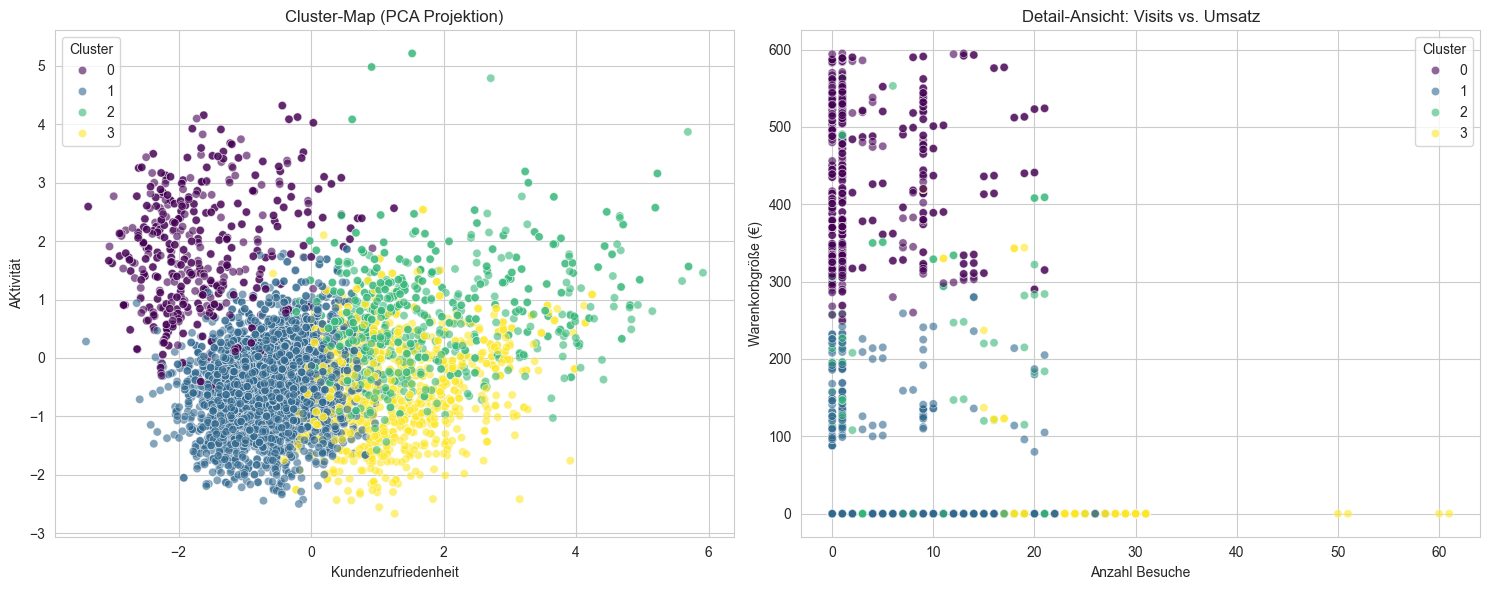

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Daten laden & vorbereiten
df = pd.read_csv('Data_eCommerce.csv')
df.rename(columns={'Shirtsyment': 'Payment', 'BasSize': 'BasketSize'}, inplace=True)
df = df.drop_duplicates(subset=df.columns.difference(['CustID']))

# Imputation
for col in ['Distance', 'NumOrders', 'LastOrder', 'Visits', 'Coupons']:
    df[col] = df[col].fillna(df[col].median())
df['FaceTime'] = df['FaceTime'].fillna(df['FaceTime'].mean())

# 2. Features Skalieren & Clustern
features = ['Visits', 'Distance', 'FaceTime', 'NumOrders', 'LastOrder', 'Returns', 'BasketSize', 'Csat']
X_scaled = StandardScaler().fit_transform(df[features])

# K-Means (4 Cluster)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. PCA für die Visualisierung (8D -> 2D)
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)
df['PCA1'] = coords[:, 0]
df['PCA2'] = coords[:, 1]

# 4. Plotten
plt.figure(figsize=(15, 6))

# Plot A: Die abstrakte "Punktewolke" (PCA)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Cluster-Map (PCA Projektion)')
plt.xlabel('Aktivität')
plt.ylabel('Kundenzufriedenheit')

# Plot B: Die "Business View" (Visits vs Umsatz)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Visits', y='BasketSize', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Detail-Ansicht: Visits vs. Umsatz')
plt.xlabel('Anzahl Besuche')
plt.ylabel('Warenkorbgröße (€)')

plt.tight_layout()
plt.show()